<a href="https://colab.research.google.com/github/07Safwa03/MachineLearningTasks/blob/main/01exercise/Sleep_health_and_lifestyle_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sleep_health_and_lifestyle_dataset

In [ ]:
#import Library
import matplotlib.pyplot as plt
#library import file
import pandas as pd

#library data numerik
import numpy as np

#library claster
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dfane = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv',sep=';',engine='python')

In [ ]:
dfane.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,201.000000,41.663342,7.094264,7.271820,58.152120,5.431421,70.226933,6751.620948
std,115.902977,8.604294,0.794916,1.209723,20.786638,1.787711,4.112283,1602.093510
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,101.000000,35.000000,6.400000,6.000000,45.000000,4.000000,68.000000,5200.000000
50%,201.000000,41.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,301.000000,49.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,401.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
#melihat karakter data
dfane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                401 non-null    int64  
 1   Gender                   401 non-null    object 
 2   Age                      401 non-null    int64  
 3   Occupation               401 non-null    object 
 4   Sleep Duration           401 non-null    float64
 5   Quality of Sleep         401 non-null    int64  
 6   Physical Activity Level  401 non-null    int64  
 7   Stress Level             401 non-null    int64  
 8   BMI Category             401 non-null    object 
 9   Blood Pressure           401 non-null    object 
 10  Heart Rate               401 non-null    int64  
 11  Daily Steps              401 non-null    int64  
 12  Sleep Disorder           159 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 40.9+ KB


Text(0.5, 1.0, 'Sleep Healt and Lifestyle Dataset')

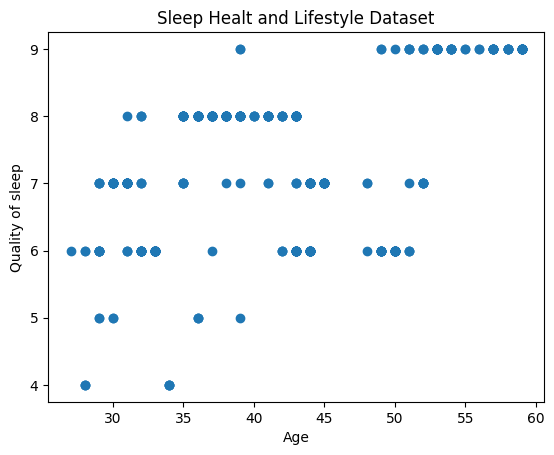

In [ ]:
#visualisasi data
plt.scatter(dfane['Age'] , dfane['Quality of Sleep'])
plt.xlabel('Age')
plt.ylabel('Quality of sleep')
plt.title ("Sleep Healt and Lifestyle Dataset")

In [ ]:
#data training
print(dfane.columns)

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')


In [ ]:
#split dataset into train and test data
from sklearn.model_selection import train_test_split
x = dfane.drop('Quality of Sleep', axis=1)
y = dfane['Quality of Sleep']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
x_train

,Person ID,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
18,19,Female,29,Nurse,6.5,40,7,Normal Weight,132/87,80,4000,Insomnia
203,204,Male,43,Engineer,6.9,47,7,Normal Weight,117/76,69,6800,NaN
351,352,Female,57,Nurse,8.1,75,3,Overweight,140/95,68,7000,Sleep Apnea
275,276,Female,49,Nurse,6.2,90,8,Overweight,140/95,75,10000,Sleep Apnea
63,64,Male,32,Doctor,6.2,30,8,Normal,125/80,72,5000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,Male,33,Doctor,6.1,30,8,Normal,125/80,72,5000,NaN
106,107,Female,37,Nurse,6.1,42,6,Overweight,126/83,77,4200,NaN
270,271,Female,49,Nurse,6.1,90,8,Overweight,140/95,75,10000,Sleep Apnea
348,349,Female,57,Nurse,8.2,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
#Menentukan klaster
from sklearn.cluster import KMeans
kmean = KMeans (n_clusters=2)
kmean

KMeans(n_clusters=2)

In [ ]:
#klasterisasi
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
x_train_encoded = ohe.fit_transform(x_train[['Gender']])


In [ ]:
# Assuming you want to predict clusters for your training data
kmean.fit(x_train_encoded)  # Fit the KMeans model to your encoded data
y_cluster = kmean.predict(x_train_encoded)  # Predict cluster assignments

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Create a new column in 'dfane' and fill it with a placeholder (e.g., NaN)
dfane['klaster'] = np.nan

In [ ]:
dfane

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,klaster
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,NaN
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,397,Female,36,Teacher,7.2,8,60,4,Normal,115/75,68,7000,NaN,NaN
397,398,Female,36,Teacher,7.2,8,60,4,Normal,115/75,68,7000,NaN,NaN
398,399,Female,36,Teacher,7.2,8,60,4,Normal,115/75,68,7000,NaN,NaN
399,400,Male,36,Teacher,6.6,5,35,7,Overweight,129/84,74,4800,Sleep Apnea,NaN


In [ ]:
#melihat centroid
kmean.cluster_centers_

array([[1., 0.],
       [0., 1.]])